In [1]:
import pandas as panda

In [2]:
# Dados sobre a divisão política e administrativa do município de São Paulo
dist_df = panda.read_csv("dados/geosampa_distritos.csv", sep=',')

#  Quantidade de famílias em situação de extrema pobreza de São Paulo
'''col: distrito, ano, qtd_familias,ds_nome'''

fam_df = panda.read_csv("dados/observasampa_familias_extrema_pobreza.csv", sep=',')

1. Quantas famílias em situação de extrema pobreza existiam em São Paulo em 2023?

In [3]:
ano2023 = fam_df[fam_df["ano"] == 2023]

In [4]:
qtfam = ano2023['qtd_familias'].sum()

In [108]:
print(f'A quantidade de famílias em extrema pobreza para o ano de 2023 foi {qtfam} famílias')

A quantidade de famílias em extrema pobreza para o ano de 2023 foi 765114.0 famílias


2. Qual o percentual (em relação ao total da cidade) de famílias em situação de
extrema pobreza por Distrito em 2023?

In [6]:
ex2 = panda.DataFrame()
ex2['distrito'] = ano2023['distrito']
ex2['%qtd'] = (ano2023['qtd_familias'] / qtfam)*100
ex2.loc[len(ex2.index)] = ['TOTAL', qtfam]

In [8]:
ex2

,distrito,%qtd
960,Parque Do Carmo,0.778838
961,Pedreira,2.270381
962,Penha,0.875817
963,Perdizes,0.078028
964,Perus,1.354047
...,...,...
1052,Cidade Dutra,1.547351
1053,Cidade Líder,1.316274
1054,Cidade Tiradentes,2.968447
1055,Consolação,0.060252


3. Qual distrito apresentou o maior aumento de famílias em situação de pobreza entre
2022 e 2023?

In [9]:
ex3 = panda.DataFrame()

ex3_2022 = fam_df.loc[fam_df['ano'] == 2022, ['distrito', 'qtd_familias']]
ex3_2022 = ex3_2022.rename(columns={'qtd_familias': 2022})

ex3_2023 = fam_df.loc[fam_df['ano'] == 2023, ['distrito', 'qtd_familias']]
ex3_2023 = ex3_2023.rename(columns={'qtd_familias': 2023})

ex3 = ex3_2022.merge(ex3_2023, left_on = 'distrito', right_on='distrito')

In [70]:
ex3['variação'] = (ex3[2023]/ex3[2022] - 1)*100

In [ ]:
distrito = ex3.loc[ex3['variação'] == ex3['variação'].max(), ['distrito']]
distrito = distrito.to_string(header=False, index=False)
variacao = ex3.loc[ex3['variação'] == ex3['variação'].max(), ['variação']]
variacao = float(variacao.iloc[0])

In [100]:
print(f'O distrito com o maior crescimento de famílias em situação de pobreza foi {distrito}, com uma variação {variacao:.2f}%')

O distrito com o maior crescimento de famílias em situação de pobreza foi Tatuapé, com uma variação 156.17%


4. Quantas famílias em situação de extrema pobreza existiam em cada Subprefeitura
de São Paulo em 2023?


In [12]:
ex4 = panda.merge(ano2023, dist_df, on = "ds_nome")


In [13]:
ex4 = ex4.groupby(['ds_subpref']).qtd_familias.sum()

In [14]:
ex4

ds_subpref
ARICANDUVA-FORMOSA-CARRAO    11267.0
BUTANTA                      18099.0
CAMPO LIMPO                  38395.0
CAPELA DO SOCORRO            47173.0
CASA VERDE-CACHOEIRINHA      16810.0
CIDADE ADEMAR                44446.0
CIDADE TIRADENTES            22712.0
ERMELINO MATARAZZO           15760.0
FREGUESIA-BRASILANDIA        31033.0
GUAIANASES                   27741.0
IPIRANGA                     20947.0
ITAIM PAULISTA               37587.0
ITAQUERA                     39223.0
JABAQUARA                    13725.0
JACANA-TREMEMBE              20897.0
LAPA                          6372.0
M BOI MIRIM                  47031.0
MOOCA                        24634.0
PARELHEIROS                  17638.0
PENHA                        27499.0
PERUS                        17680.0
PINHEIROS                     2357.0
PIRITUBA-JARAGUA             30399.0
SANTANA-TUCURUVI             10476.0
SANTO AMARO                   7670.0
SAO MATEUS                   41585.0
SAO MIGUEL                 

5. Como variou o número de famílias em situação de pobreza entre 2013 e 2023 nos
Distritos de Grajaú, Jardim Ângela, Cidade Ademar? Exiba graficamente o resultado,
escolhendo a visualização que achar mais adequada.

In [15]:
graph = panda.DataFrame()

In [16]:
graph['GRAJAU'] = fam_df.loc[fam_df.ds_nome == 'GRAJAU', ['qtd_familias','ano']].set_index('ano')
graph['JARDIM ANGELA'] = fam_df.loc[fam_df.ds_nome == 'JARDIM ANGELA', ['qtd_familias','ano']].set_index('ano')
graph['CIDADE ADEMAR'] = fam_df.loc[fam_df.ds_nome == 'CIDADE ADEMAR', ['qtd_familias','ano']].set_index('ano')


<Axes: title={'center': 'Evolução da quantidade de famílias em situação de pobreza'}, xlabel='ano da coleta', ylabel='quantidade de famílias'>

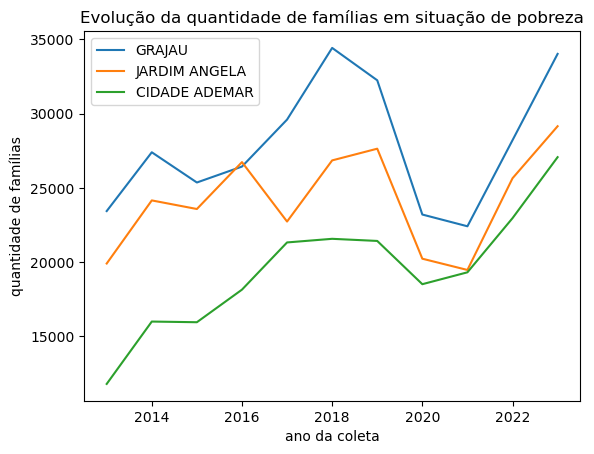

In [62]:

graph.plot(kind='line', 
           title='Evolução da quantidade de famílias em situação de pobreza', 
           xlabel='ano da coleta', 
           ylabel='quantidade de famílias',
           )

6. Complete a seguinte frase: "De acordo com os dados do ObservaSampa, em 2023
metade dos Distritos de São Paulo, no máximo, ___ famílias em situação de extrema
pobreza". Qual informação você utilizou par acompletar a frase?

In [23]:
ano2023 = ano2023.sort_values(by='qtd_familias', ascending=False)

In [32]:
metade = ano2023.loc[ano2023['qtd_familias']> ano2023['qtd_familias'].quantile(0.5), ['qtd_familias']].sum()

In [42]:
resposta = (metade/qtfam)*100
resposta = float(resposta.iloc[0])

In [45]:
print(f'De acordo com os dados do ObservaSampa, em 2023 metade dos Distritos de São Paulo, no máximo, correspondem à {resposta:.2f}% das famílias em situação de extrema pobreza')

De acordo com os dados do ObservaSampa, em 2023 metade dos Distritos de São Paulo, no máximo, correspondem à 82.89% das famílias em situação de extrema pobreza
